In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
auto_data=pd.read_csv('auto-mpg.data.txt',header=None,delim_whitespace=True)
auto_data.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
cols=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']

In [4]:
auto_data.columns=cols
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
len(auto_data['car name'].unique())

305

In [6]:
len(auto_data)

398

In [7]:
auto_data=auto_data.drop('car name',axis=1)
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [8]:
auto_data['origin']=auto_data['origin'].replace({1:'america',2:'europe',3:'asia'})
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,america
1,15.0,8,350.0,165.0,3693.0,11.5,70,america
2,18.0,8,318.0,150.0,3436.0,11.0,70,america
3,16.0,8,304.0,150.0,3433.0,12.0,70,america
4,17.0,8,302.0,140.0,3449.0,10.5,70,america


In [9]:
auto_data=pd.get_dummies(auto_data,columns=['origin'])
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [10]:
auto_data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [11]:
auto_data=auto_data.replace('?',np.nan)

In [12]:
auto_data.isnull().sum()

mpg               0
cylinders         0
displacement      0
horsepower        6
weight            0
acceleration      0
model year        0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

In [13]:
auto_data=auto_data.dropna()
auto_data.isnull().sum()

mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
model year        0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

X=auto_data.drop('mpg',axis=1)

y=auto_data['mpg']

In [15]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
from sklearn.svm import SVR


In [37]:
regression_model=SVR(kernel='linear',C=0.5)
regression_model.fit(x_train,y_train)

SVR(C=0.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [38]:
regression_model.score(x_train,y_train)

0.8087716316091305

In [39]:
regression_model.coef_

array([[-0.91314346,  0.02268979,  0.01915072, -0.00724669,  0.21985595,
         0.91803899, -1.6119645 ,  0.40460805,  1.20735645]])

In [40]:
cls=x_train.columns

In [41]:
coef=pd.Series(regression_model.coef_[0],cls).sort_values()
coef

origin_america   -1.611964
cylinders        -0.913143
weight           -0.007247
horsepower        0.019151
displacement      0.022690
acceleration      0.219856
origin_asia       0.404608
model year        0.918039
origin_europe     1.207356
dtype: float64

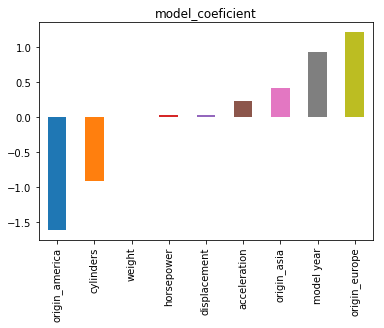

In [42]:
coef.plot(kind='bar',title='model_coeficient')

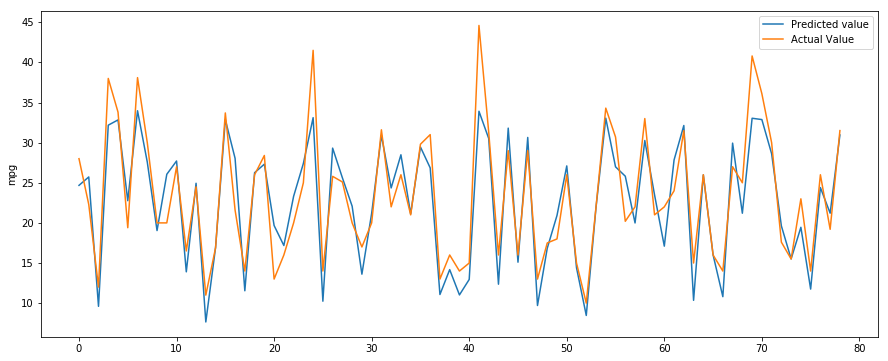

In [43]:
y_predicts=regression_model.predict(x_test)
plt.figure(figsize=(15,6))
plt.plot(y_predicts,label='Predicted value')
plt.plot(y_test.values,label='Actual Value')
plt.ylabel('mpg')
plt.legend()
plt.show()

In [46]:
regression_model.score(x_test,y_test)

0.8262845397302738

In [47]:
from sklearn.metrics import mean_squared_error
svm_mse=mean_squared_error(y_test,y_predicts)
svm_mse

10.797339127966195

In [48]:
from math import sqrt
sqrt(svm_mse)

3.285930481304526